In [76]:
from astropy import coordinates,units,constants
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In [146]:
## load all satellite galaxies
data = ascii.read("./Drlica-Wagner2020.txt")

## let's calculate the angular size of these galaxies ---## oops they're actually in the column ah
distance=np.array(data['D'])## distance of these galaxies in kpc


### Crab pulsar let's say 1kJy for a reasonable example?
crabgp=1000*units.Jy 
crabgp=100*units.Jy ## 1.4 GHz based on -3.3 scale
crabgp=9.8e3*units.Jy ## 1kJy at 1.4 GHz 



crab=(7175*units.lightyear).to(units.kpc)
crab_pf=14*units.mJy.to(units.Jy)

vela_pf=1100*units.mJy.to(units.Jy)
vela=0.28*units.kpc

mockcrab=crabgp*crab**2/(distance*units.kpc)**2
print('Crab GP at 10kpc:',crabgp*crab**2/(10*units.kpc)**2)

data.add_column(col=mockcrab,name='CrabGP')
print (data) ## if you want to have a look at the whole table

Crab GP at 10kpc: 474.26178997083406 Jy
       Name       Survey Class  RAdeg   ... r1/2  VMag Ref       CrabGP      
                                 deg    ...  pc   mag              Jy        
----------------- ------ ----- -------- ... ---- ----- --- ------------------
        Antlia II     --     4 143.8868 ... 2301 -9.03   1 2.7218881426241626
      Aquarius II    PS1     4 338.4813 ...  125  -4.4   2   4.06603043527807
         Bootes I    PS1     4   210.02 ...  160 -6.02   3  10.88755257049665
        Bootes II    PS1     4 209.5141 ...   33 -2.94   3 26.885589000614175
       Bootes III    PS1     4    209.3 ...  289 -5.75   4 21.469524217783345
        Bootes IV    PS1     3  233.689 ...  277 -4.53   5 1.0857393145093612
 Canes Venatici I    PS1     4 202.0091 ...  338  -8.8   3 0.9979416504730958
Canes Venatici II    PS1     4 194.2927 ...   55 -5.17   3 1.8525851170735705
           Carina     --     4 100.4065 ...  248 -9.43   3  4.301694240098268
        Carina II     --

In [147]:
data[data['Name']=='Sagittarius II']


Name,Survey,Class,RAdeg,DEdeg,m-M,ah,l_e,e,D,r1/2,VMag,Ref,CrabGP
,,,deg,deg,mag,arcmin,,,kpc,pc,mag,,Jy
str17,str8,int64,float64,float64,float64,float64,str1,float64,int64,int64,float64,str6,float64
Sagittarius II,PS1,4,298.1647,-22.0651,19.2,1.6,<,0.1,69,32,-5.2,22,9.961390253535686


In [111]:
### filter parkes sample
##parkes dec -32.99839
pks_targets=data[(data['DEdeg']<(-32.99839+90-30.25))*(data['Class']==4)]
# print(pks_targets)
print(pks_targets['CrabGP'])
f=open("satellite gal names.txt",'w')
for i in pks_targets['RAdeg','DEdeg']:
    f.write(str(i[0])+" "+str(i[1])+"; ")
#     print(i[0],i[1])
f.close()

for i in pks_targets:
    print(i["CrabGP"])

[ 2.72188814  4.06603044 10.88755257 26.885589    4.30169424 36.59427392
 60.49257525 24.49699328  3.46454664  0.32843614  2.19474196  2.72188814
  7.59913139 60.49257525 18.9704716   0.73510724  0.87358726  1.99975455
  1.49684948  1.02598548  6.8843343   1.43177693 52.69575444 70.15706952
  9.96139025  6.72139725 89.65251228  6.41240927 12.33771566 14.09815071
 20.58427908] Jy
2.7218881426241626 Jy
4.06603043527807 Jy
10.88755257049665 Jy
26.885589000614175 Jy
4.301694240098268 Jy
36.594273917502626 Jy
60.49257525138189 Jy
24.496993283617464 Jy
3.464546643077172 Jy
0.3284361426390818 Jy
2.19474195923381 Jy
2.7218881426241626 Jy
7.599131388733121 Jy
60.49257525138189 Jy
18.970471598833363 Jy
0.7351072446692821 Jy
0.8735872644013227 Jy
1.9997545537646908 Jy
1.4968494822965348 Jy
1.0259854839823344 Jy
6.884334300636291 Jy
1.4317769290267905 Jy
52.69575444120379 Jy
70.15706952231274 Jy
9.961390253535686 Jy
6.721397250153544 Jy
89.65251228182119 Jy
6.41240927488959 Jy
12.337715660011293 J

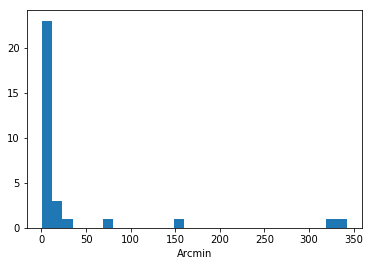

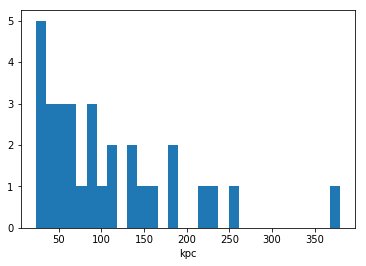

In [112]:
plt.hist(pks_targets['ah'],bins=30)
plt.xlabel("Arcmin")
plt.show()
plt.hist(pks_targets['D'],bins=30)
plt.xlabel("kpc")
plt.show()

In [136]:
###radiometer equation
def radiofunc(sigma,tsys,tsky,G,B,tobs):
    return (sigma*(tsys+tsky))/(G*np.sqrt(2*B*tobs))
### an sefd way of estimation
def sefd_rms(sigma,sefd,tobs,b):
    return (sefd/np.sqrt(tobs*b)*sigma)

tsky=2.5 ###kelvin


###parkes telescope UWL
pks_tsys=21
pks_g=1.8
#pks_sefd=29
pks_b=(4-0.7)*1e9 ###Hz

single_bw=pks_b/8192
tobs=0.001 ###width or integration time ##seconds
print("Parkes Radio Telescope UWL")
pks_sens=radiofunc(10,pks_tsys,tsky,pks_g,pks_b,tobs)
singlechan_sens=radiofunc(10,pks_tsys,tsky,pks_g,single_bw,tobs)

print(pks_sens,"Jy ms for single pulse total")
print(singlechan_sens, "Jy ms")

print("1 hour integration sensitivity",radiofunc(10,pks_tsys,tsky,pks_g,pks_b,3600) )

Parkes Radio Telescope UWL
0.05081868107721053 Jy ms for single pulse total
4.599581952083462 Jy ms
1 hour integration sensitivity 2.678379664828073e-05


one kilojansky pulse every 33.3924123 seconds
1.4 GHz flux 0.10153154954452945
1kJy 1.4 GHz flux- ---> translates to 9.849155306759329


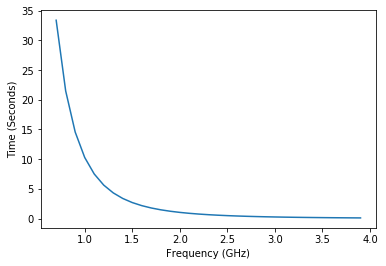

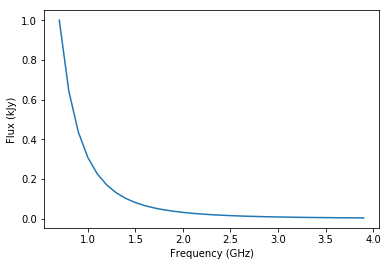

In [114]:
#Crab GP
#1 kJy ms pulse ~ 0.1% of all rotations
# crab period 0.0333924123 s

tobs_1p=0.0333924123/0.001
print ("one kilojansky pulse every",tobs_1p,"seconds")

plt.plot(np.arange(0.7,4,0.1),tobs_1p*(np.arange(0.7,4,0.1)/0.7)**(-3.3))
plt.ylabel("Time (Seconds)")

# plt.plot(np.arange(0.7,4,0.1),1*(np.arange(0.7,4,0.1)/0.7)**(-2.3))
# plt.ylabel("Flux Jy")
plt.xlabel("Frequency (GHz)")
plt.figure()
plt.plot(np.arange(0.7,4,0.1),1*(np.arange(0.7,4,0.1)/0.7)**(-3.3))
print ("1.4 GHz flux",1*2**(-3.3))
print ("1kJy 1.4 GHz flux- ---> translates to",1/2**(-3.3))

plt.xlabel("Frequency (GHz)")
plt.ylabel("Flux (kJy)")
plt.show()

In [115]:
###survey times in seconds

pmbs_time=2100
htru_time=4300
askap_t=10*3600 ##hrs
superb_t=560

utmost=9
#### craft-gp has 63.117 antenna_days
gp_total=63.117*24 ###hours
####parkes and ASKAP FOV
askap=22.9022104447
parkes=0.5558873668
palfa=0.01713858784 ##3.35 arcmin (3.35/2/60)^2*7*pi
gbt=0.03692682 ##13 arcmin (3.35/2/60)^2*7*pi
print("gbt fov is %.5f"%((13.01/2/60)**2*np.pi))
print("planned CRAFT-GP total FOV is %f deg $^2$"%(askap*160))
print("real CRAFT-GP total coverage is %f deg $^2$ hrs"%(askap*63.117*24))
#####this needs to be fixed

pmbs_start=2100/3600#*0.5558873668
pmbs_x=np.array([1e2,pmbs_start,1e-5])
pmbs_y=pmbs_x*0+pks_sens

htru_start=4300/3600#*0.5558873668
htru_x=np.array([1e2,htru_start,1e-5])
htru_y=htru_x*0+pks_sens

utmost10=10#*utmost
utmost_sens=3
utmost_start=10#*22.9022104447
utmost_x=np.array([1e2,utmost_start,1e-5])
utmost_y=utmost_x*0+3

askap_start=10#*22.9022104447
askap_x=np.array([1e2,askap_start,1e-5])
askap_y=askap_x*0+2*10


gbt_start=10#*gbt
gbt_x=np.array([1e2,gbt_start,1e-5])
gbt_y=gbt_x*0+gbt_sens

alfa_start=10#*gbt
alfa_x=np.array([1e2,alfa_start,1e-5])
alfa_y=alfa_x*0+alfa_sens

superb_s=560/3600#*0.5558873668
superb_x=np.array([1e2,superb_s,1e-5])
superb_y=superb_x*0+pks_sens

##### log normal pulse stack distribution

def log_normal(sigma,mu,x):
    pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * (sigma**2)))/ (x * sigma * np.sqrt(2 * np.pi)))
    ##e^(-(log(x) - μ)^2/(2 σ^2))/(sqrt(2 π) σ x)
    return pdf

def gauss_normal(x):
    pdf=np.exp(-(x)**2/(2 * 1**2))/ (1 * np.sqrt(2 * np.pi))
    return pdf
print(log_normal(0.1,1.0,1))

gbt fov is 0.03693
planned CRAFT-GP total FOV is 3664.353671 deg $^2$
real CRAFT-GP total coverage is 34692.451599 deg $^2$ hrs
7.694598626706474e-22


17.62 3.6
0.3306227040223175


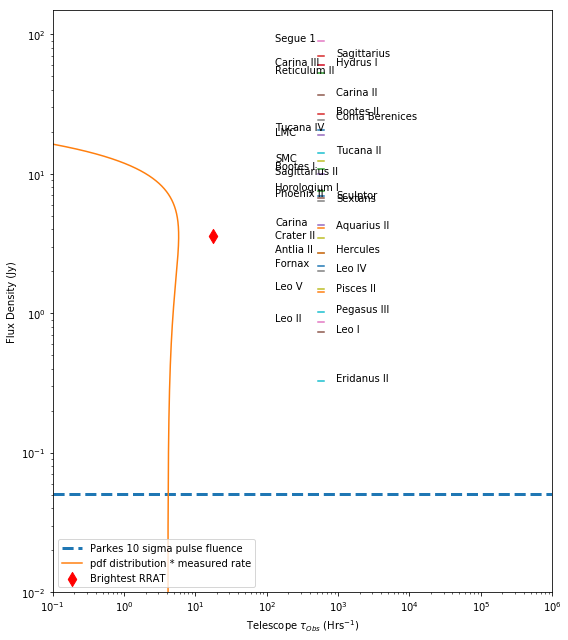

40


In [135]:
plt.figure(figsize=(8,9))
from scipy import signal
b_rate=np.loadtxt('../cat/b_rates')
b_wd=np.loadtxt('../cat/b_wd')
b_flux=np.loadtxt('../cat/b_rates_flux')

oc=b_rate#/3600
flux=b_flux/1000

max=np.where(flux==flux.max())[0][0]
###oc[max],flux[max]
###normalized energy value is
lgn_e=flux[max]
print(oc[max],lgn_e)

lgn_sig=0.15
lgn_mu=1.5

distr=np.arange(0.01,10,0.01)
#fluxx3=log_normal(lgn_sig,lgn_mu,5)
fdistr=log_normal(lgn_sig,lgn_mu,distr)
distr=np.arange(0.01,10,0.01)
distr2=np.arange(-3,3,0.01)

#fluxx3=log_normal(lgn_sig,lgn_mu,3)
fdistr=log_normal(lgn_sig,lgn_mu,distr)
g_noise=gauss_normal(distr2)


max=np.where(flux==flux.max())[0][0]



res=signal.convolve(fdistr, g_noise, mode='same') / sum(fdistr)
#print (distr2)
apos=np.where(res==res.max())
x_res=np.linspace(0,10,len(res))
dpos=x_res[apos]-1
x_res=x_res-dpos
#print(np.intersect1d(np.where(x_res>5),np.where(x_res<5.01)))
sig5pos=np.intersect1d(np.where(x_res>5),np.where(x_res<5.01))[0]
print(res.max())
#print(sum(fdistr*distr))
#print(fluxx3,fluxx3*oc[max])


plt.xscale('log')
plt.yscale('log')
plt.ylabel('Flux Density (Jy)')
plt.xlabel("Telescope $\\tau_{Obs}$ (Hrs$^{-1}$)")


crab_rate=1/(tobs_1p*(1.4/0.7)**(-2.3))*3600
# plt.plot([crab_rate,crab_rate],[1e-2,1000],label='rate at 1.4GHz crab 1kJy GP')
k=-200
for i in pks_targets:
    plt.plot([crab_rate-10,crab_rate+100],[i["CrabGP"].value,i["CrabGP"].value])
    plt.annotate(i["Name"],(crab_rate+2*k,i["CrabGP"].value))
    k=k*-1
    
plt.plot([1e-1,1e6],[pks_sens,pks_sens],'--',c='C0',linewidth=3,label="Parkes 10 sigma pulse fluence")
plt.scatter(oc[max],flux[max],s=100,marker="d",c='red',label='Brightest RRAT')
#plt.plot(oc[max]*fdistr,flux[max]*distr)
plt.plot(oc[max]*res,flux[max]*x_res,label="pdf distribution * measured rate")
plt.xlim(1e-1,1e6)
plt.ylim(1e-2,1.5e2)
#plt.grid(True)
plt.legend(loc=3)
plt.tight_layout()
plt.savefig("rrat_space.pdf")
plt.show()
#print(pmbs_y)
print(len(oc))

In [ ]:
#LeoIV 